In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
original_df = pd.read_csv('faithful.csv')
original_df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [80]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df = scaler.fit_transform(original_df)
# Transform scaled data back into a DataFrame
df = pd.DataFrame(df, columns=original_df.columns, index=original_df.index)
df.head()

,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


### Problem 1
#### a.) Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 point)

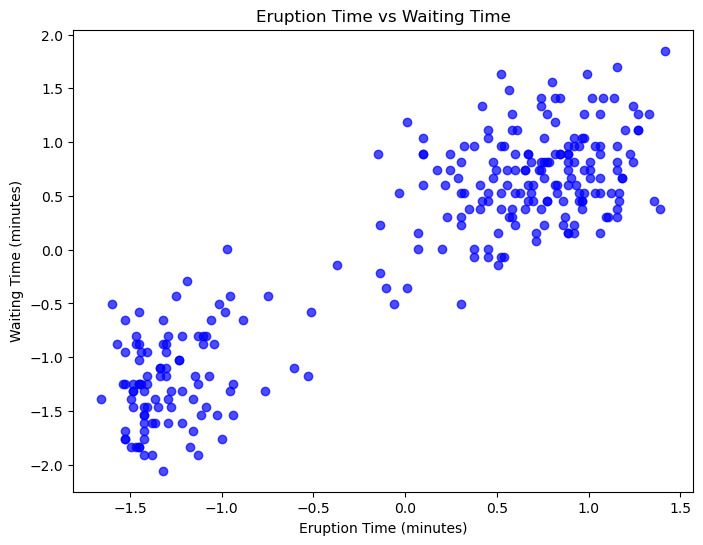

In [82]:
# Create a scatter plot of eruption time versus waiting time
plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7,color = 'blue')
plt.title("Eruption Time vs Waiting Time")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.show()


#### b.) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)
##### Ans : 2 clusters.


#### c.) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 
##### Ans : The steps of a hierarchical clustering 
##### First of all, we treat each data point as a separate cluster 
##### Second, Find the closest clusters and merge them based on a linkage criteria.
##### Then repeat the second step until we get one big cluster.
##### If we implement DIANA hierachical clustering, I would say hierarchical clustering is appropriate for this data set. This is because we  have 2 distinct clusters which hierarchical clustering can  particularly perform efficiently with. In addition, it would also be easy to identify these two major clusters from the dendrogram, confirming natural grouping seen on the scatter plot.


### Problem 2 
#### a.)Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

In [87]:
#Create function kmean with objective 
def kmeans(data, k, max_iters=100, tol=1e-4):
    """
    K-means clustering algorithm with objective function tracking.

    Parameters:
    - data
    - k:the number of clusters
    - max_iters: the maximum number of iterations (default is 100)
    - tol: float, tolerance to declare convergence (default is 1e-4)

    Returns:
    - centroids: numpy array of shape (k, n_features) representing the final cluster centers
    - labels: numpy array of shape (n_samples,) representing the cluster assignment of each point
    - objectives: list of objective function values at each iteration
    """
    
    data_np = df.values
    n_samples, n_features = data_np.shape
    
    # Step 1: Randomly initialize the centroids
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data_np[random_indices, :]
    
    objectives = []  # To store the objective function values at each iteration

    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        # First, calculate euclidean distance by using np.linalg.norm(point-centroid)
        # Create a for-loop to calculate distance between each data point and centroids : np.linalg.norm(point - centroid) for centroid in centroids]
        # np.argmin : Finds the index(0,1) of the smallest distance, which corresponds to the closest centroid.
        labels = np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in centroids]) for point in data_np])

        
        # Calculate the objective function (within-cluster sum of squares)
        objective = np.sum([np.linalg.norm(data_np[i] - centroids[labels[i]]) ** 2 for i in range(n_samples)])
        objectives.append(objective)
        
        # Step 3: Calculate new centroids from the clusters
        new_centroids = np.array([data_np[labels == i].mean(axis=0) for i in range(k)])
        
        # Step 4: Check for convergence (if the centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids
    
    return centroids, labels, objectives



In [89]:
# Set the number of clusters
k = 2 
centroids, labels ,objectives= kmeans(df,k)

In [104]:
centroids

array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])

In [93]:
objectives

[648.0765509793864,
 332.92425158202735,
 80.1270520167674,
 79.66576539216611,
 79.6058107577547,
 79.57595948827701]

#### b.) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points) 

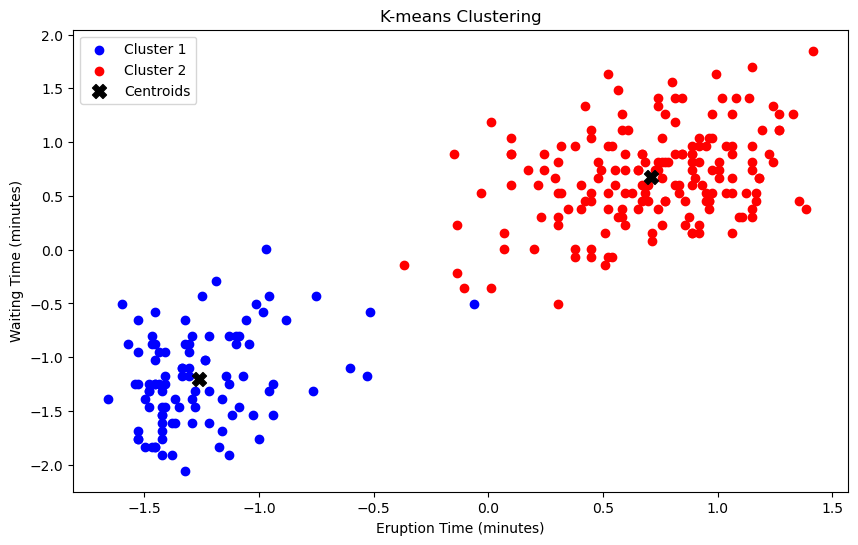

In [96]:
# Define colors for each cluster
colors = ['blue', 'red']  
# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster with custom colors
for i in range(k):
    cluster_points = df.values[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')

# Add plot details
plt.title('K-means Clustering')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.show()

#### c.) A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is (10 points)


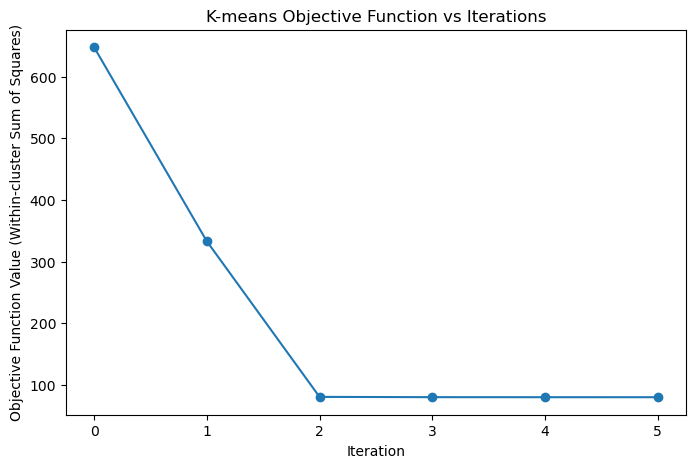

In [99]:

# Plotting the objective function vs iterations
plt.figure(figsize=(8, 5))
plt.plot(objectives, marker='o')
plt.title('K-means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Within-cluster Sum of Squares)')

plt.show()


#### d.) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)
##### Ans : Yes, it did. As you can see from (b), we obtained 2 clusters, consistent with our observations in the first problem. Therefore, another random initialization is unnecessary. However, some data points in each cluster are quite far from the centroid, implying that the model is not 100% accurate.
